In [1]:
import h5py
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cmocean.cm as cmo
from mpl_toolkits.axes_grid1 import ImageGrid
plt.style.use('~/Python_Tool/ryan_mplstyle.mplstyle')

from scipy.stats import skew

In [2]:
Bu = 8

Ly_instab = 8
Ly = Ly_instab*4
Ny = 256
Lx = Ly*2
Nx = Ny*2

In [3]:
SW_zeta1_skew_max = np.array([])
SW_zeta2_skew_max = np.array([])
P1_zeta1_skew_max = np.array([])
P1_zeta2_skew_max = np.array([])

Ro_ary = [0.01,0.03,0.05,0.08,0.1]

for Ro in Ro_ary:
    print(Ro)
    # SW
    diagname = '2LaySW_dg_%.2f_%.3f_%d' %(Ly_instab,Ro,Nx)
    diagname = diagname.replace(".", "d" ); 
    
    diagname = ''+diagname+'/'+diagname+'_s1.h5'
    # xi = np.inf
    
    with h5py.File(diagname, mode='r') as file:
        
        dg_time_ary = np.array(file['scales']['sim_time'])
    
        SW_zeta1_skew = np.array(file['tasks']['zeta1_skew'])
        SW_zeta2_skew = np.array(file['tasks']['zeta2_skew'])
    
    diagname = '2LayP1_dg_%.2f_%.3f_%d' %(Ly_instab,Ro,Nx)
    diagname = diagname.replace(".", "d" ); 
    
    diagname = ''+diagname+'/'+diagname+'_s1.h5'
    # xi = np.inf
    
    with h5py.File(diagname, mode='r') as file:
        
        dg_time_ary = np.array(file['scales']['sim_time'])
    
        P1_zeta1_skew = np.array(file['tasks']['zeta1_skew'])
        P1_zeta2_skew = np.array(file['tasks']['zeta2_skew'])

    #################################
    SW_zeta1_skew_max = np.append(SW_zeta1_skew_max, np.max(SW_zeta1_skew[0:300]))
    SW_zeta2_skew_max = np.append(SW_zeta2_skew_max, np.max(SW_zeta2_skew[0:300]))
    P1_zeta1_skew_max = np.append(P1_zeta1_skew_max, np.max(P1_zeta1_skew[0:300]))
    P1_zeta2_skew_max = np.append(P1_zeta2_skew_max, np.max(P1_zeta2_skew[0:300]))

0.01
0.03
0.05
0.08
0.1


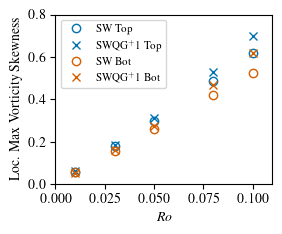

In [6]:
fig=plt.figure(figsize=(2.8, 2.2))

min_x = 1000

im0 = plt.plot(Ro_ary,SW_zeta1_skew_max,'o',color=[0,0.4453125,0.6953125],label="SW Top", mfc='none')
im0 = plt.plot(Ro_ary,P1_zeta1_skew_max,'x',color=[0,0.4453125,0.6953125],label="SWQG$^+1$ Top")
im0 = plt.plot(Ro_ary,SW_zeta2_skew_max,'o',color=[0.83203125,0.3671875,0.],label="SW Bot", mfc='none')
im0 = plt.plot(Ro_ary,P1_zeta2_skew_max,'x',color=[0.83203125,0.3671875,0.],label="SWQG$^+1$ Bot")
# im0 = plt.plot(dg_time_ary[1:min_x],SW_zeta2_skew[1:min_x,0,0],label="Bot layer")
plt.xlabel("$Ro$"); 
plt.ylabel("Loc. Max Vorticity Skewness")
# plt.set_title("Shallow water")
plt.ylim(0,0.8); 
plt.xlim(0,0.11)
plt.legend()

figname = 'figs/MaxSkew_Rosweep.pdf'
plt.savefig(figname, bbox_inches='tight')
plt.show()